### **LIBRARIES**

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We can start by reading the dataset

In [2]:
# load the dataset
df = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [3]:
# print the first 5 elements of the dataset
df.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [4]:
# print the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


As we can see, we have over 35000 observations with non-null values, but now we need to check wheter there are NaN values. But before doing that, we need to change the type of the date column, setting it to datetime

In [5]:
# convert date in date format
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')

In [6]:
# check if there are NaN values 
nan_val = df.isna().sum()
print("Number of NaN values:")
print(nan_val)

Number of NaN values:
location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


In [40]:
# check how many unique countries have used the vaccine
num = df["location"].nunique()
print(f"The study have been measured on {num} locations, which are:")

print(df["location"].unique())

The study have been measured on 43 locations, which are:
['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Chile' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Ecuador' 'Estonia' 'Finland' 'France' 'Germany'
 'Hong Kong' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Nepal' 'Netherlands'
 'Norway' 'Peru' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United States' 'Uruguay' 'European Union']


We have 0 None values and 0 NaN values, but we do have a repetion of the data total_vaccination, so what we could do is to delete the column 'date' and group by the sum of a specific vaccination.

In [8]:
# we create a new dataframe data in which there are only 3 columns: Area, Vaccine and Total_vaccine
data = pd.DataFrame(columns=['Area', 'Vaccine', 'Total_vaccine'])
for country in df["location"].unique():
    for vaccine in df["vaccine"].unique():
        filtered_data = df[(df['location'] == country) & (df['vaccine'] == vaccine)]
        total_count = filtered_data['total_vaccinations'].max()
        data = pd.concat([data, pd.DataFrame({'Area': [country], 'Vaccine': [vaccine], 'Total_vaccine': [total_count]})], ignore_index=True)

In [9]:
# check if there are NaN values 
nan_val = data.isna().sum()
print("Number of NaN values:")
print(nan_val)

Number of NaN values:
Area               0
Vaccine            0
Total_vaccine    236
dtype: int64


We can see how now there are 236 NaN values due to the aggregation, so we proceed to drop the respective records (we can do it because they have no additional value to our data)

In [10]:
# drop NaN values
data.dropna(axis=0,inplace=True)

Let's check the new dataset

In [11]:
data.head(10)

,Area,Vaccine,Total_vaccine
0,Argentina,Moderna,6507561
1,Argentina,Oxford/AstraZeneca,25977231
2,Argentina,Sinopharm/Beijing,28322602
3,Argentina,Sputnik V,20405678
4,Argentina,CanSino,610540
5,Argentina,Pfizer/BioNTech,14681054
10,Austria,Moderna,1585063
11,Austria,Oxford/AstraZeneca,1588222
15,Austria,Pfizer/BioNTech,14584985
16,Austria,Johnson&Johnson,363548


We can analyze the areas in which people got vaccinated the most

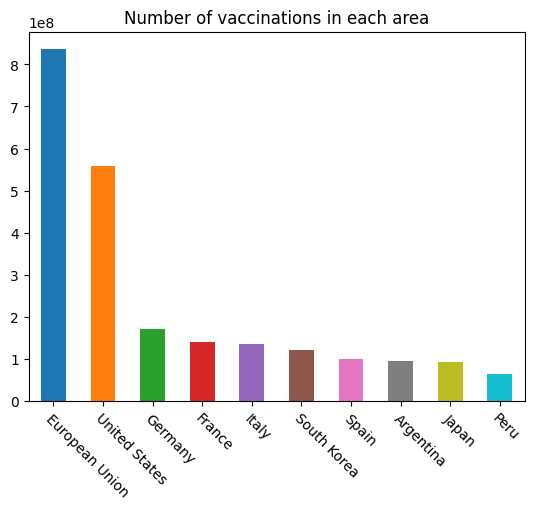

In [12]:
# array of colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# converting the total_vaccine column into numeric 
data['Total_vaccine'] = pd.to_numeric(data['Total_vaccine'], errors='coerce')

# group by the location and summing the total_vaccine value
country_vaccine_totals = data.groupby('Area')['Total_vaccine'].sum()

# selecting the biggest 10 values of total vaccine by area
ax = country_vaccine_totals.nlargest(10).plot(kind="bar", color = colors)

# labels on the plot
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") # rotation and alignment of text
plt.title("Number of vaccinations in each area")  # title
plt.xlabel("")

# plot
plt.show()

As expected the European Union is the area in which people got the most vaccinated because its records are the sum of the records of the countries who are in the European Union

Let's check how many different vaccines have been used and how many areas used them

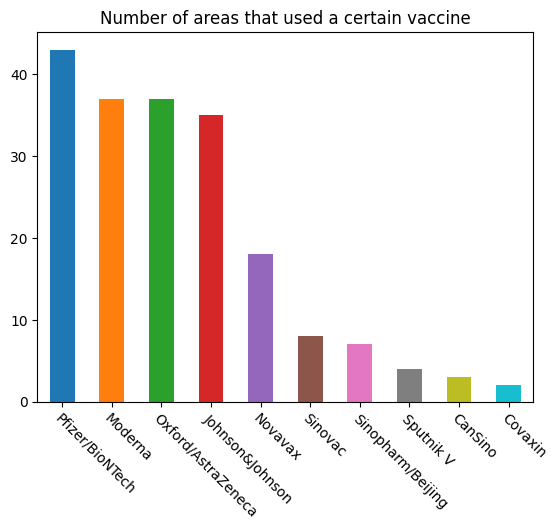

In [13]:
ax = data["Vaccine"].value_counts().plot(kind="bar", color=colors)

# labels on the plot
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") # rotation and alignment of text
plt.title("Number of areas that used a certain vaccine")  # title
plt.xlabel("")

# plot
plt.show()

As we can see, every country has used the Pfizer/BioNTech vaccine, while Moderna, Oxford/AstraZeneca and Johnson&Johnson have been used by over 80% of all countries

What we could do now is to see which of the vaccines have been used the most in each country:

In [14]:
# new dataframe with columns Area and Vaccine
data2 = pd.DataFrame(columns=['Area', 'Vaccine'])
data["Total_vaccine"] = pd.to_numeric(data["Total_vaccine"], errors="coerce") # coerce converts any non integer value into NaN

for country in data["Area"].unique():
    new_data = data[data["Area"] == country]
    max_vaccine = new_data.loc[new_data["Total_vaccine"].idxmax(), "Vaccine"]
    data2 = pd.concat([data2, pd.DataFrame({'Area': [country], 'Vaccine': [max_vaccine]})], ignore_index=True)

Let's check our new dataset

In [15]:
data2.head()

,Area,Vaccine
0,Argentina,Sinopharm/Beijing
1,Austria,Pfizer/BioNTech
2,Belgium,Pfizer/BioNTech
3,Bulgaria,Pfizer/BioNTech
4,Chile,Sinovac


We can now proceed to visually graph it

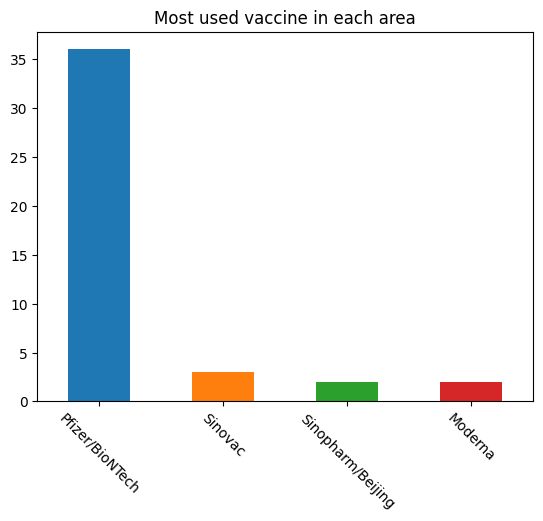

In [16]:
ax = data2["Vaccine"].value_counts().plot(kind="bar", color=colors)

# labels on the plot
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="center") # rotation and alignment of text
plt.title("Most used vaccine in each area")  # title
plt.xlabel("")
# plot
plt.show()

As we can see, the Pfizer/BioNTech was significantly the most used vaccine in most of the countries. Let's see the numbers:

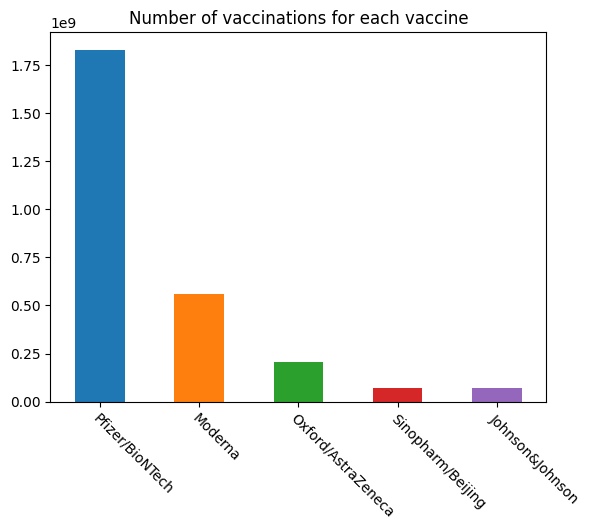

In [17]:
# group by Vaccine and sum the total vaccine 
country_vaccine_totals = data.groupby('Vaccine')['Total_vaccine'].sum()

# select the 5 vaccines most used
ax = country_vaccine_totals.nlargest(5).plot(kind="bar", color = colors)

# labels on the plot
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") # rotation and alignment of text
plt.title("Number of vaccinations for each vaccine")  # title
plt.xlabel("")

# plot
plt.show()

As we can see, Pfizer/BioNTech is the vaccine that has been used the most in most areas and the most in general

We can lastly plot the trend of total vaccinations according to locations

In [34]:
# function to plot the curve of trend
def plot_trend(dataframe,feature,title,country):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,25))
    
    for i,country in enumerate(country):
        plt.subplot(9,5,i+1)
        data = dataframe[dataframe['location'] == country]
        sns.lineplot(x=data['date'], y=data[feature], label = feature)
        plt.xlabel('')
        plt.tick_params(axis='x',which='both',top=False,bottom=False,labelbottom=False)
        plt.title(country)
        
    plt.suptitle(title,y=1.05)
    plt.tight_layout()
    plt.show()

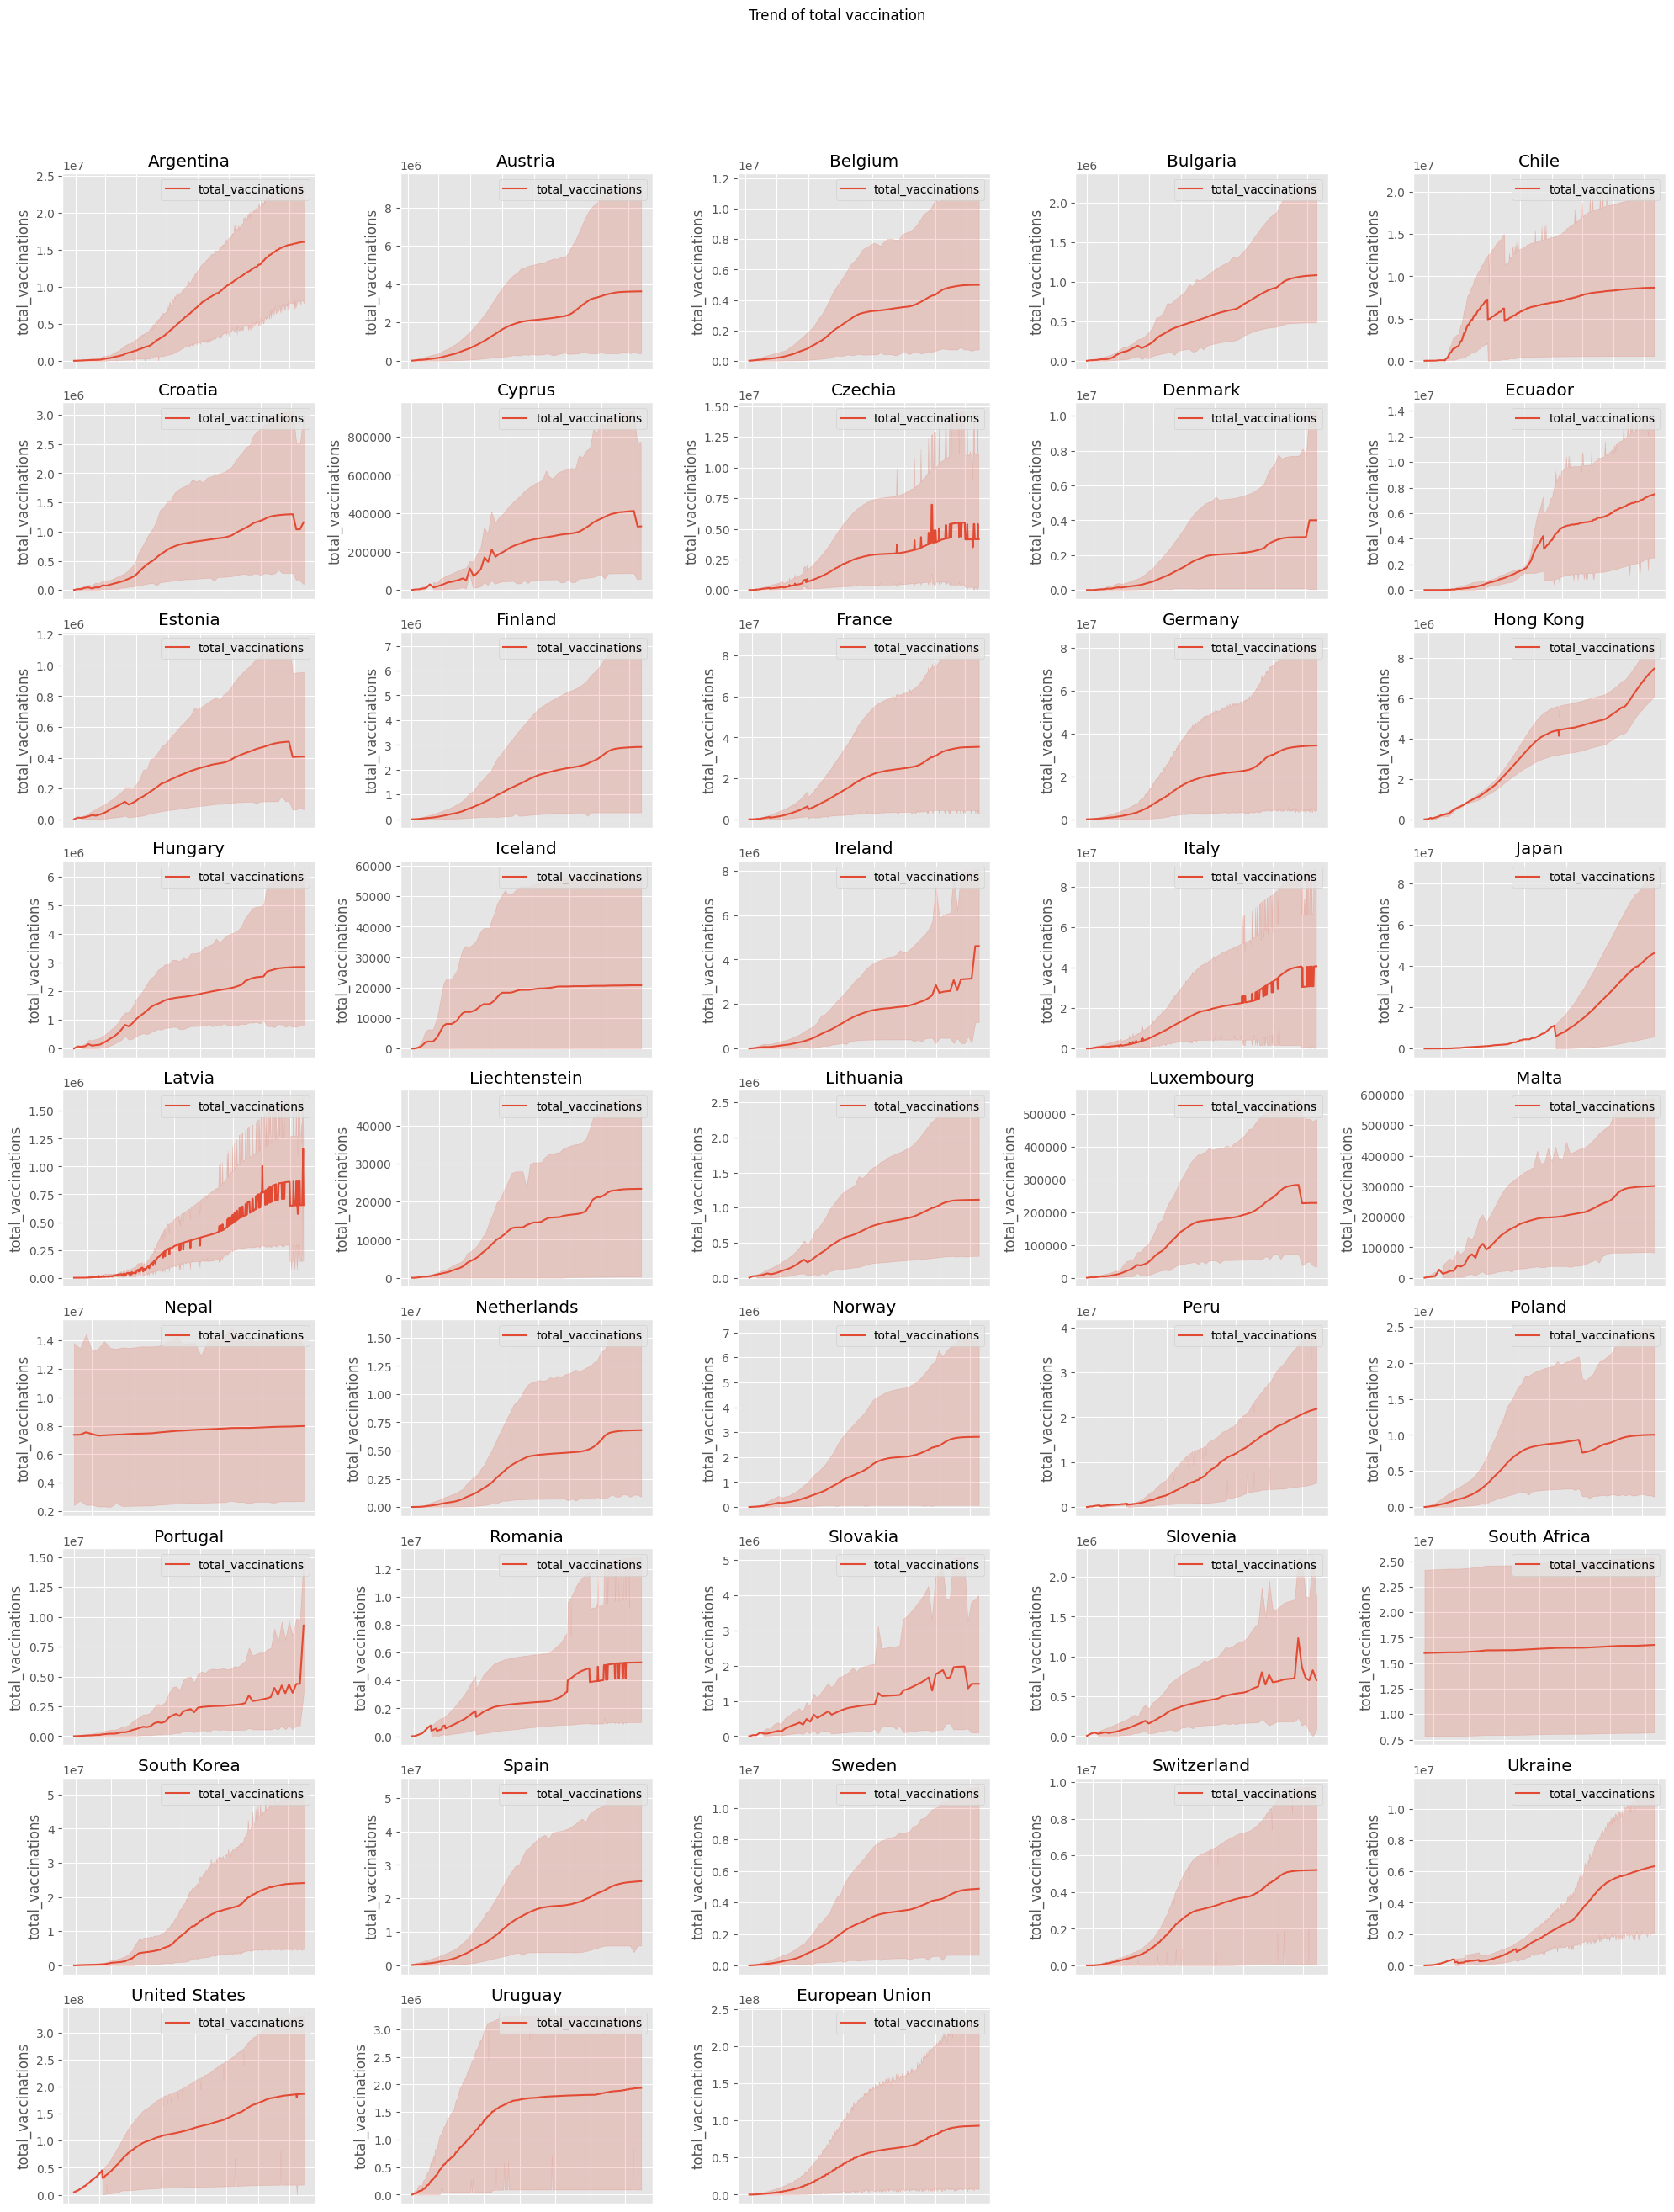

In [42]:
# plotting the trend of total vaccination
country = df["location"].unique()
plot_trend(df,'total_vaccinations','Trend of total vaccination',country)